## Observations and Insights 

#### The following observations were determined based on the analysis in this notebook:

#### 1. Capomulin and Ramicane had the most data points recorded. Furthermore based on the statistical analysis of the four drugs (Capomulin, Ramicane, Infubinol, and Ceftamin), Capomulin and Ramicane were the most effective in reducing tumor size in the mice subjects.

#### 2. The linear regression model for Capomulin was accurate to an r-squared value of 0.903, indicating that about 90% of the data points fit the regression model that was calculated. This concludes that average tumor volume in a mouse subject has a clear correlation to the weight of a mouse subject.

#### 3. The distribution of genders is split just about evenly (50.7% male versus 49.3% female). It does not appear at first glance that the various drug regimens affect males and females differently. However, further analysis would be required to determine a correlation. Another interesting analysis would be looking into tumor sizes across genders to see if one gender is more susceptable.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = mouse_metadata.merge(study_results, how = 'outer') 

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

number_of_mice = pd.DataFrame([{"Number of Mice": combined_data['Mouse ID'].nunique()}])
number_of_mice

,Number of Mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_df = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint']).reset_index()
mice_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1883,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1884,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1885,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1886,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicates = combined_data.duplicated(['Mouse ID', 'Timepoint'])

In [5]:
# Checking the number of mice in the clean DataFrame.
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

number_of_mice_clean = pd.DataFrame([{"Number of Mice": mice_df['Mouse ID'].nunique()}])
number_of_mice_clean

,Number of Mice
0,249


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median = mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_var = mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_std = mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem = mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_summary = pd.DataFrame([tumor_mean.to_dict(), 
                              tumor_median.to_dict(), 
                              tumor_var.to_dict(), 
                              tumor_std.to_dict(), 
                              tumor_sem.to_dict()])

tumor_summary_transposed = tumor_summary.transpose()
tumor_summary_transposed = tumor_summary_transposed.rename(columns={0:'Mean Tumor Size',
                                                                    1:'Median Tumor Size',
                                                                    2:'Variance Tumor Size',
                                                                    3:'St. Dev. Tumor Size',
                                                                    4:'Standard Error Tumor Size'})
tumor_summary_transposed

,Mean Tumor Size,Median Tumor Size,Variance Tumor Size,St. Dev. Tumor Size,Standard Error Tumor Size
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_agg = mice_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']}).rename(columns={'mean':'Mean Tumor Size',
                                                                                                                                     'median':'Median Tumor Size',
                                                                                                                                     'var':'Variance Tumor Size',
                                                                                                                                     'std':'St. Dev. Tumor Size',
                                                                                                                                     'sem':'Standard Error Tumor Size'})
tumor_summary_agg

Tumor Volume (mm3)                                        \
                Mean Tumor Size Median Tumor Size Variance Tumor Size   
Drug Regimen                                                            
Capomulin             40.675741         41.557809           24.947764   
Ceftamin              52.591172         51.776157           39.290177   
Infubinol             52.884795         51.820584           43.128684   
Ketapril              55.235638         53.698743           68.553577   
Naftisol              54.331565         52.509285           66.173479   
Placebo               54.033581         52.288934           61.168083   
Propriva              52.393463         50.909965           43.138803   
Ramicane              40.216745         40.673236           23.486704   
Stelasyn              54.233149         52.431737           59.450562   
Zoniferol             53.236507         51.818479           48.533355   

                                                            
             St. Dev. Tumor Size Standard Error Tumor Size  
Drug Regimen                                                
Capomulin               4.994774                  0.329346  
Ceftamin                6.268188                  0.469821  
Infubinol               6.567243                  0.492236  
Ketapril                8.279709                  0.603860  
Naftisol                8.134708                  0.596466  
Placebo                 7.821003                  0.581331  
Propriva                6.568014                  0.525862  
Ramicane                4.846308                  0.320955  
Stelasyn                7.710419                  0.573111  
Zoniferol               6.966589                  0.516398

## Bar and Pie Charts

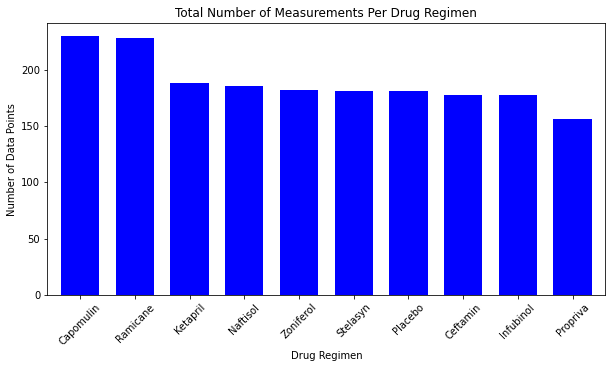

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

regimen_plot = mice_df['Drug Regimen'].value_counts().plot.bar(figsize=(10,5), 
                            title='Total Number of Measurements Per Drug Regimen',
                            xlabel='Drug Regimen',
                            ylabel='Number of Data Points',
                            rot=45,
                            color='b',
                            width=0.7)


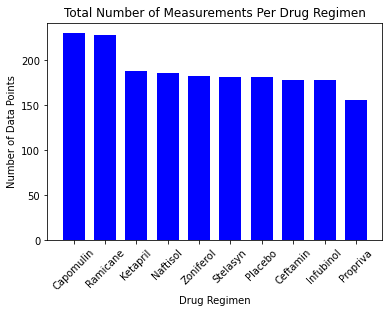

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_counts = mice_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(regimen_counts))
tick_locations = [value for value in x_axis]
drug_labels = regimen_counts.index.values

plt.bar(x_axis, regimen_counts, color='b', align='center', width=0.7)
plt.title('Total Number of Measurements Per Drug Regimen')
plt.xticks(tick_locations, drug_labels, rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

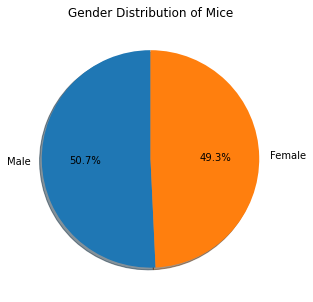

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = mice_df['Sex'].value_counts()

gender_df.plot(kind='pie', figsize=(10,5), 
                           title='Gender Distribution of Mice',
                           startangle=90,
                           shadow=True,
                           autopct='%1.1f%%',
                           ylabel='');

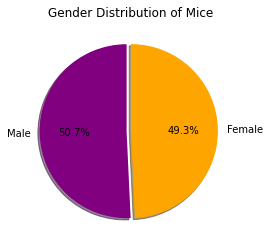

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_labels = ['Male','Female'] 
genders = mice_df['Sex'].value_counts()
explode = (0.05, 0)
colors = ['purple','orange']

plt.pie(genders, explode=explode, labels=gender_labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Gender Distribution of Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = pd.DataFrame(mice_df.groupby(['Mouse ID'])['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_data = pd.merge(mice_df, max_tp, how='inner', on=['Mouse ID','Timepoint'])
tumor_data

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,k403,Ramicane,Male,21,16,45,22.050126,1
1,19,s185,Capomulin,Female,3,17,45,23.343598,1
2,29,x401,Capomulin,Female,16,15,45,28.484033,0
3,39,m601,Capomulin,Male,22,17,45,28.430964,1
4,49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...,...
244,1859,z314,Stelasyn,Female,21,28,5,45.934712,0
245,1862,z435,Propriva,Female,12,26,10,48.710661,0
246,1872,z581,Infubinol,Female,24,25,45,62.754451,3
247,1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
for drug in drugs:
    
    drug_df = tumor_data.loc[(tumor_data['Drug Regimen'] == drug)]
    volume = drug_df['Tumor Volume (mm3)']
    tumor_volume_data.append(volume)
    
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_df = drug_df.loc[(drug_df['Tumor Volume (mm3)'] <= lower_bound) | (drug_df['Tumor Volume (mm3)'] >= upper_bound)]
    outlier = outlier_df['Tumor Volume (mm3)'].count()
    
    print(f'{drug}')
    print(f'IQR: {round(iqr,3)}')
    print(f'Lower Bound: {round(lower_bound,3)}')
    print(f'Upper Bound: {round(upper_bound,3)}')
    print(f'Number of Outliers: {outlier}')
    print('')


Capomulin
IQR: 7.782
Lower Bound: 20.705
Upper Bound: 51.832
Number of Outliers: 0

Ramicane
IQR: 9.099
Lower Bound: 17.913
Upper Bound: 54.307
Number of Outliers: 0

Infubinol
IQR: 11.477
Lower Bound: 36.833
Upper Bound: 82.741
Number of Outliers: 1

Ceftamin
IQR: 15.578
Lower Bound: 25.355
Upper Bound: 87.666
Number of Outliers: 0



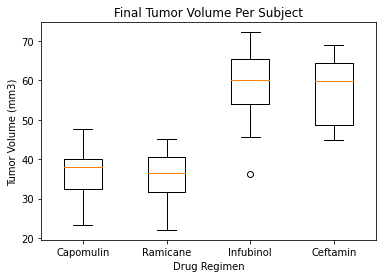

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume_data)
plt.title('Final Tumor Volume Per Subject')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.xticks([1,2,3,4],drugs)
plt.show()

## Line and Scatter Plots

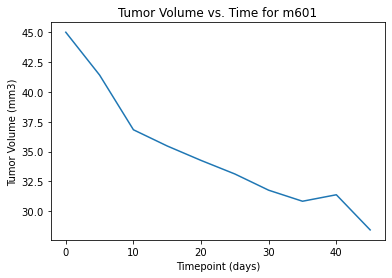

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = mice_df.loc[mice_df['Drug Regimen'] == 'Capomulin']
single_mouse = capomulin_data.loc[mice_df['Mouse ID'] == 'm601']

x_axis = single_mouse['Timepoint']
data = single_mouse['Tumor Volume (mm3)']
plt.plot(x_axis, data)
plt.title('Tumor Volume vs. Time for m601')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

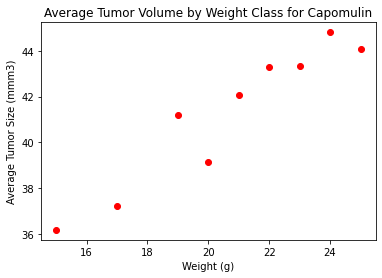

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().sort_index()

plt.scatter(tumor.index, tumor, marker='o', facecolors='r')
plt.title('Average Tumor Volume by Weight Class for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Size (mmm3)')
plt.show()

## Correlation and Regression

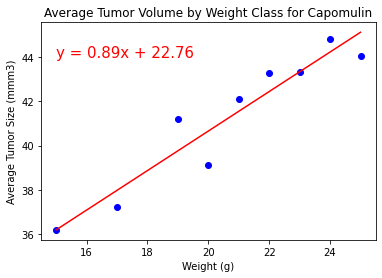

The r-squared value is: 0.903


In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(tumor.index, tumor)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tumor.index,tumor)
regress_values = tumor.index * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(tumor.index, tumor, marker='o', facecolors='b')
plt.plot(tumor.index, regress_values, 'r-')
plt.title('Average Tumor Volume by Weight Class for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Size (mmm3)')
plt.annotate(line_eq, (15,44), fontsize=15, color='red')
plt.show()

print(f'The r-squared value is: {round(rvalue**2,3)}')